# Pathfinding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import cv2

from robot_child.pathfinding.search import load_map, bfs
from robot_child.orb.utils import timer
from robot_child.orb import draw

## Load Map

here we load the map and process it to be binary.

We also create a dilated version to account for vehicle size.

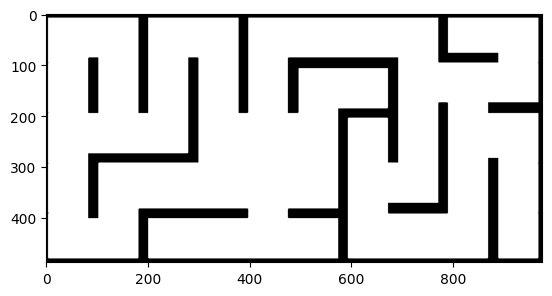

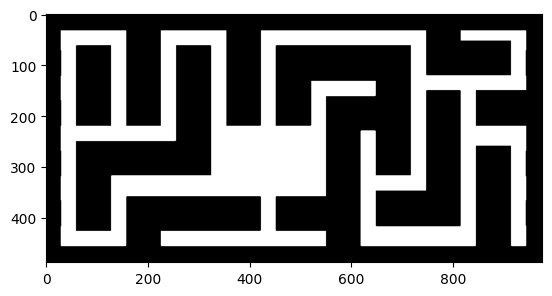

In [2]:
map, occ = load_map("example_grid.png")

plt.imshow(map, cmap='binary')
plt.show()
plt.imshow(occ, cmap='binary')
plt.show()

returning
BFS start=(50, 50), end=(50, 200) Time: 0.1110s
returning
BFS start=(50, 200), end=(50, 50) Time: 0.1608s
returning
BFS start=(50, 50), end=(150, 50) Time: 0.0643s
returning
BFS start=(50, 50), end=(450, 250) Time: 1.2261s
returning
BFS start=(820, 50), end=(700, 450) Time: 0.9661s
returning
BFS start=(820, 50), end=(880, 50) Time: 0.0114s
returning
BFS start=(50, 450), end=(880, 50) Time: 3.2741s


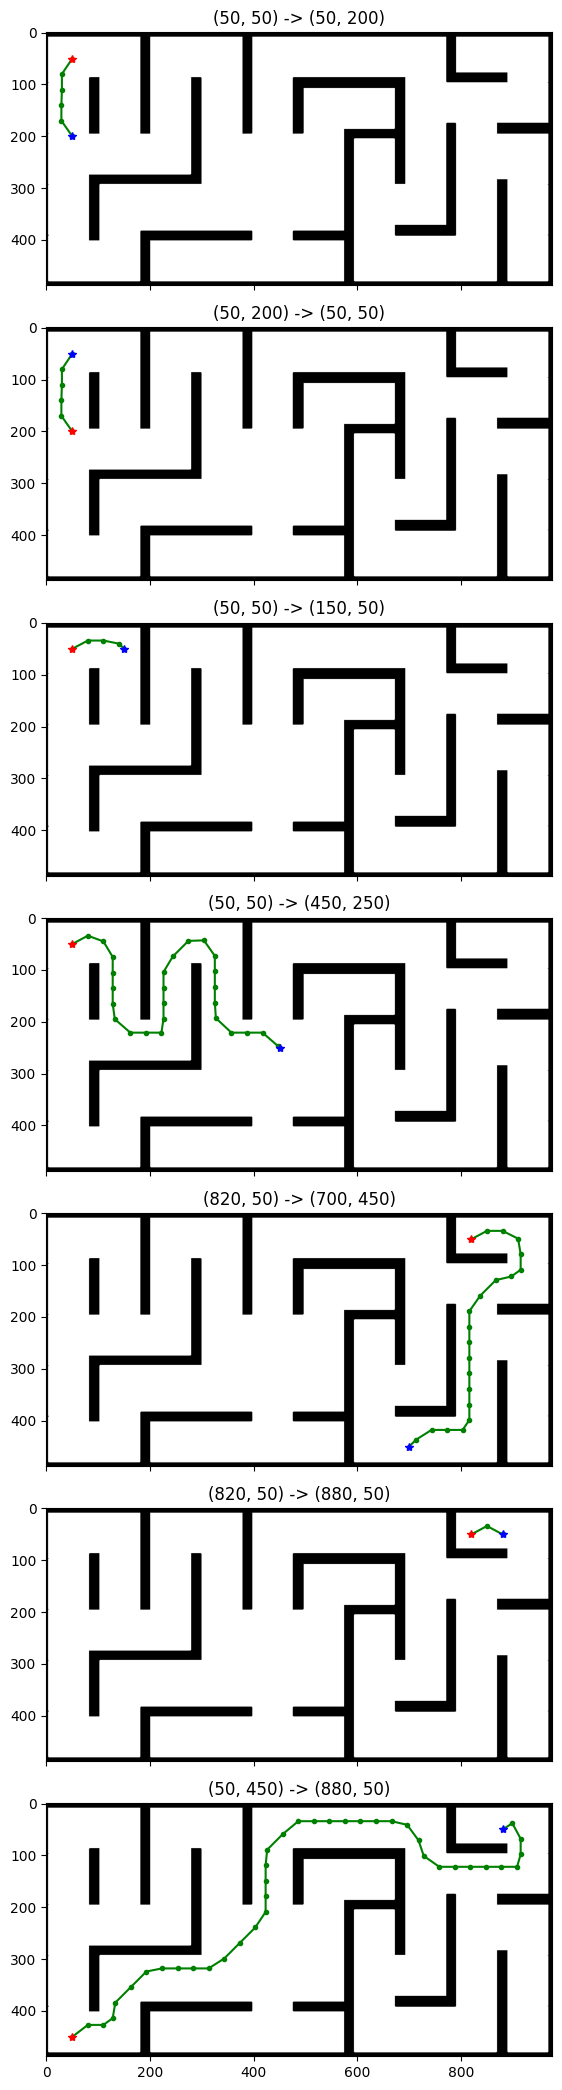

In [5]:
def Point(x, y):
    return (x, y)

test_pairs = [
    (Point(50, 50), Point(50, 200)),
    (Point(50, 200), Point(50, 50)),
    (Point(50, 50), Point(150, 50)),
    # (Point(50, 50), Point(180, 100)),
    (Point(50, 50), Point(450, 250)),
    (Point(820, 50), Point(700, 450)),
    (Point(820, 50), Point(880, 50)),
    (Point(50, 450), Point(880, 50)),
]

nrows = len(test_pairs)
ncols = 1

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*3), sharex=True, sharey=True)

for ax, (start, end) in zip(axes, test_pairs):
    with timer(f"BFS {start=}, {end=}"):
        path = bfs(start, end, occ.T)

    ax.set_title(f"{start} -> {end}")
    ax.imshow(map, cmap='binary')
    step_size = 30
    path = [*path[::step_size], path[-1]]
    ax.plot([p[0] for p in path], [p[1] for p in path], 'g.-')
    ax.plot(start[0], start[1], 'r*')
    ax.plot(end[0], end[1], 'b*')
    
plt.tight_layout()
plt.show()